0. 학습 환결 설정하기
1. 데이터셋 불러오기
2. EDA
3. 모델 학습을 위한 데이터 전처리
4. 모델 학습하기
5. 모델 평가하기
6. 모델 학습 결과 심화 분석하기

## 0. 학습 환경 설정하기

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sqlite3

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [2]:
os.environ['KAGGLE_USERNAME'] = 'fastcampuskim'
os.environ['KAGGLE_KEY'] = 'c939a1e37f5ca93b6406a66fc8bb08e5'

## 1. 데이터셋 불러오기
* 데이터셋 출처 : https://www.kaggle.com/hugomathien/soccer
* 7개 테이블
    Country: 국가 정보
    League: 리그 정보
    Match: 경기 정보 (주 데이터셋)
    Player: 플레이어 정보
    Player_Attributes: 플레이어의 특성
    Team: 팀 정보
    Team_Attributes: 팀의 특성

In [6]:
# sqlite3.connect()와 pd.read_sql_query()로 csv파일 읽어들이기
conn = sqlite3.connect('./database.sqlite')
df_country = pd.read_sql_query('SELECT * from Country', conn)
df_league = pd.read_sql_query('SELECT * from League', conn)
df_match = pd.read_sql_query('SELECT * from Match', conn)
df_player = pd.read_sql_query('SELECT * from Player', conn)
df_player_att = pd.read_sql_query('SELECT * from Player_Attributes', conn)
df_team = pd.read_sql_query('SELECT * from Team', conn)
df_team_att = pd.read_sql_query('SELECT * from Team_Attributes', conn)

## 2. EDA


In [7]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [8]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [9]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [10]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [11]:
df_league['id'].unique()

array([    1,  1729,  4769,  7809, 10257, 13274, 15722, 17642, 19694,
       21518, 24558])

In [12]:
df_league['country_id'].unique()

array([    1,  1729,  4769,  7809, 10257, 13274, 15722, 17642, 19694,
       21518, 24558])

In [13]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [14]:
for c in df_match.columns:
  print(c)

id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
a

In [15]:
for c, num in zip(df_match.columns, df_match.isna().sum()):
  print(c, num)

id 0
country_id 0
league_id 0
season 0
stage 0
date 0
match_api_id 0
home_team_api_id 0
away_team_api_id 0
home_team_goal 0
away_team_goal 0
home_player_X1 1821
home_player_X2 1821
home_player_X3 1832
home_player_X4 1832
home_player_X5 1832
home_player_X6 1832
home_player_X7 1832
home_player_X8 1832
home_player_X9 1832
home_player_X10 1832
home_player_X11 1832
away_player_X1 1832
away_player_X2 1832
away_player_X3 1832
away_player_X4 1832
away_player_X5 1832
away_player_X6 1832
away_player_X7 1832
away_player_X8 1832
away_player_X9 1833
away_player_X10 1833
away_player_X11 1839
home_player_Y1 1821
home_player_Y2 1821
home_player_Y3 1832
home_player_Y4 1832
home_player_Y5 1832
home_player_Y6 1832
home_player_Y7 1832
home_player_Y8 1832
home_player_Y9 1832
home_player_Y10 1832
home_player_Y11 1832
away_player_Y1 1832
away_player_Y2 1832
away_player_Y3 1832
away_player_Y4 1832
away_player_Y5 1832
away_player_Y6 1832
away_player_Y7 1832
away_player_Y8 1832
away_player_Y9 1833
away_player_Y

In [16]:
df_match.drop(df_match.columns[-38:], axis=1, inplace=True)

In [17]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [19]:
df_player_att.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [20]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [21]:
df_team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


* 데이터프레임간의 관계 파악하기


In [22]:
df_player_att['player_api_id'].value_counts()

210278    56
41269     56
42116     55
26472     54
179795    53
          ..
163254     2
266280     2
37366      2
238766     2
26568      2
Name: player_api_id, Length: 11060, dtype: int64

In [23]:
df_match['home_player_1'].dropna().apply(int).map(df_player_att.groupby('player_api_id').mean()['overall_rating']).isna().sum()

0

In [24]:
df_team_att['team_api_id'].value_counts()

8191    6
8668    6
8661    6
8659    6
8658    6
       ..
8613    1
6631    1
6351    1
8614    1
9824    1
Name: team_api_id, Length: 288, dtype: int64

In [25]:
df_match['away_team_api_id'].map(df_team_att.groupby('team_api_id').mean()['buildUpPlaySpeed']).isna().sum()

178

* 선수 특성 사이의 상관성 파악하기

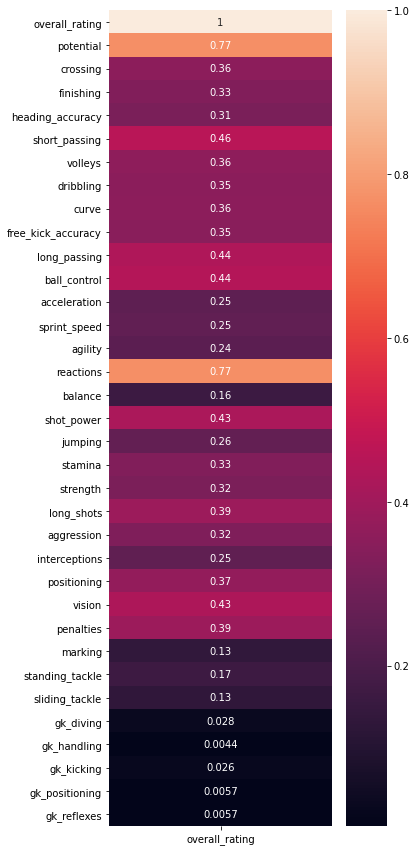

In [26]:
fig = plt.figure(figsize=(5,15))
sns.heatmap(df_player_att.drop(['id', 'player_fifa_api_id', 'player_api_id'], axis=1).corr()[['overall_rating']], annot=True)

* 매치 데이터프레임에 팀별 특성 데이터프레임 통합하기


In [27]:
df_team_att.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [28]:
df_team_att.drop('buildUpPlayDribbling', axis=1, inplace=True)

In [29]:
df_team_att.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass',
       'buildUpPlayPassing', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationPassing',
       'chanceCreationPassingClass', 'chanceCreationCrossing',
       'chanceCreationCrossingClass', 'chanceCreationShooting',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressure', 'defencePressureClass', 'defenceAggression',
       'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [30]:
def most(x):
  return x.value_counts().index[0]

In [31]:
team_map = df_team_att.groupby('team_api_id').aggregate(
    {
       'buildUpPlaySpeed': 'mean',
       'buildUpPlaySpeedClass': most,
       'buildUpPlayDribblingClass': most,
       'buildUpPlayPassing': 'mean',
       'buildUpPlayPassingClass': most,
       'buildUpPlayPositioningClass': most,
       'chanceCreationPassing': 'mean',
       'chanceCreationPassingClass': most,
       'chanceCreationCrossing': 'mean',
       'chanceCreationCrossingClass': most,
       'chanceCreationShooting': 'mean',
       'chanceCreationShootingClass': most,
       'chanceCreationPositioningClass': most,
       'defencePressure': 'mean',
       'defencePressureClass': most,
       'defenceAggression': 'mean',
       'defenceAggressionClass': most,
       'defenceTeamWidth': 'mean',
       'defenceTeamWidthClass': most,
       'defenceDefenderLineClass': most
    }
)

In [32]:
team_map

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
team_api_id,,,,,,,,,,,,,,,,,,,,
1601,47.333333,Balanced,Little,46.166667,Mixed,Organised,55.500000,Normal,60.333333,Normal,53.500000,Normal,Organised,47.166667,Medium,47.333333,Press,49.333333,Normal,Cover
1773,52.000000,Balanced,Little,50.000000,Mixed,Organised,50.000000,Normal,53.000000,Normal,54.000000,Normal,Organised,43.000000,Medium,44.000000,Press,50.000000,Normal,Cover
1957,47.166667,Balanced,Little,52.666667,Mixed,Organised,50.833333,Normal,36.333333,Normal,67.000000,Normal,Organised,49.333333,Medium,56.333333,Press,53.666667,Normal,Cover
2033,49.000000,Balanced,Little,48.400000,Mixed,Organised,51.800000,Normal,44.200000,Normal,48.200000,Normal,Free Form,42.200000,Medium,33.800000,Contain,45.400000,Normal,Cover
2182,60.333333,Balanced,Little,49.000000,Mixed,Organised,56.666667,Normal,57.333333,Normal,68.000000,Lots,Organised,51.666667,Medium,48.500000,Press,54.500000,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10281,52.833333,Balanced,Little,53.666667,Mixed,Organised,50.333333,Normal,59.166667,Lots,50.333333,Normal,Organised,45.500000,Medium,51.166667,Press,52.666667,Normal,Cover
108893,43.166667,Balanced,Little,53.166667,Mixed,Organised,46.000000,Normal,38.333333,Normal,39.500000,Normal,Organised,38.333333,Medium,46.000000,Press,46.333333,Normal,Cover
158085,67.000000,Balanced,Normal,39.000000,Mixed,Organised,55.000000,Normal,59.000000,Normal,46.000000,Normal,Organised,36.000000,Medium,38.000000,Press,37.000000,Normal,Cover


In [33]:
df = df_match[['home_team_goal', 'away_team_goal']].copy()

In [34]:
for team in ['home_', 'away_']:
  team_map.index.name = team + 'team_api_id'
  for col in team_map.columns:
    df[team + col] = df_match[team_map.index.name].map(team_map[col])

In [35]:
df.dropna(inplace=True)

In [36]:
df.head()

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,46.000000,Balanced,Little,41.500000,Mixed,Organised,46.000000,Normal,53.500000,Normal,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Normal,Cover
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Normal,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,64.000000,Balanced,Little,53.500000,Mixed,Organised,44.000000,Normal,47.666667,Normal,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Normal,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,64.666667,Normal,44.166667,Normal,Organised,51.333333,Medium,50.000000,Press,45.666667,Normal,Cover,51.666667,Balanced,Little,51.666667,Mixed,Organised,55.000000,Normal,60.666667,Lots,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover
5,1,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,49.166667,Balanced,Little,46.500000,Mixed,Organised,48.833333,Normal,55.833333,Normal,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover


* 홈과 어웨이의 골 수를 승-무-패 범주로 변환하기

In [37]:
# 홈과 어웨이의 골 수를 범주형 데이터로 변환하기 (0: 홈팀 승, 1: 무승부, 2: 어웨이팀 승)
df['matchResult'] = df[['home_team_goal', 'away_team_goal']].aggregate(lambda x: 0 if x[0] > x[1] else 1 if x[0] == x[1] else 2, axis=1)

In [38]:
df.drop(['home_team_goal', 'away_team_goal'], axis=1, inplace=True)

## 3. 모델 학습을 위한 데이터 전처리


In [42]:
col_cats = list(filter(lambda s: s.find('Class') >= 0, df.columns))
df_cats = pd.get_dummies(df[col_cats], drop_first=True)
df_cats

,home_buildUpPlaySpeedClass_Fast,home_buildUpPlaySpeedClass_Slow,home_buildUpPlayDribblingClass_Lots,home_buildUpPlayDribblingClass_Normal,home_buildUpPlayPassingClass_Mixed,home_buildUpPlayPassingClass_Short,home_buildUpPlayPositioningClass_Organised,home_chanceCreationPassingClass_Risky,home_chanceCreationPassingClass_Safe,home_chanceCreationCrossingClass_Lots,home_chanceCreationCrossingClass_Normal,home_chanceCreationShootingClass_Normal,home_chanceCreationPositioningClass_Organised,home_defencePressureClass_High,home_defencePressureClass_Medium,home_defenceAggressionClass_Double,home_defenceAggressionClass_Press,home_defenceTeamWidthClass_Normal,home_defenceTeamWidthClass_Wide,home_defenceDefenderLineClass_Offside Trap,away_buildUpPlaySpeedClass_Fast,away_buildUpPlaySpeedClass_Slow,away_buildUpPlayDribblingClass_Lots,away_buildUpPlayDribblingClass_Normal,away_buildUpPlayPassingClass_Mixed,away_buildUpPlayPassingClass_Short,away_buildUpPlayPositioningClass_Organised,away_chanceCreationPassingClass_Risky,away_chanceCreationPassingClass_Safe,away_chanceCreationCrossingClass_Lots,away_chanceCreationCrossingClass_Normal,away_chanceCreationShootingClass_Normal,away_chanceCreationPositioningClass_Organised,away_defencePressureClass_High,away_defencePressureClass_Medium,away_defenceAggressionClass_Double,away_defenceAggressionClass_Press,away_defenceTeamWidthClass_Normal,away_defenceTeamWidthClass_Wide,away_defenceDefenderLineClass_Offside Trap
0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
1,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
2,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
3,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,0,0
5,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
25974,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
25975,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
25976,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0


In [45]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.

X_num = df.drop(['matchResult'] + col_cats, axis=1)
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)

X_cat = df_cats
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['matchResult']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 4. 모델 학습하기


In [52]:
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## 5. 모델 평가하기

In [54]:
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.49      0.87      0.63      3484
           1       0.48      0.01      0.01      1972
           2       0.45      0.30      0.36      2233

    accuracy                           0.48      7689
   macro avg       0.48      0.39      0.33      7689
weighted avg       0.48      0.48      0.39      7689



In [55]:
print(sum((y_test == 0)) / len(y_test))
print(sum((y_test == 1)) / len(y_test))
print(sum((y_test == 2)) / len(y_test))

0.4531148393809338
0.2564702822213552
0.290414878397711


In [58]:
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.91      0.65      3484
           1       0.36      0.01      0.02      1972
           2       0.52      0.32      0.39      2233

    accuracy                           0.51      7689
   macro avg       0.46      0.41      0.35      7689
weighted avg       0.47      0.51      0.41      7689



## 6. 모델 학습 결과 심화 분석하기


* Logistic Regression 모델 계수로 상관성 파악하기

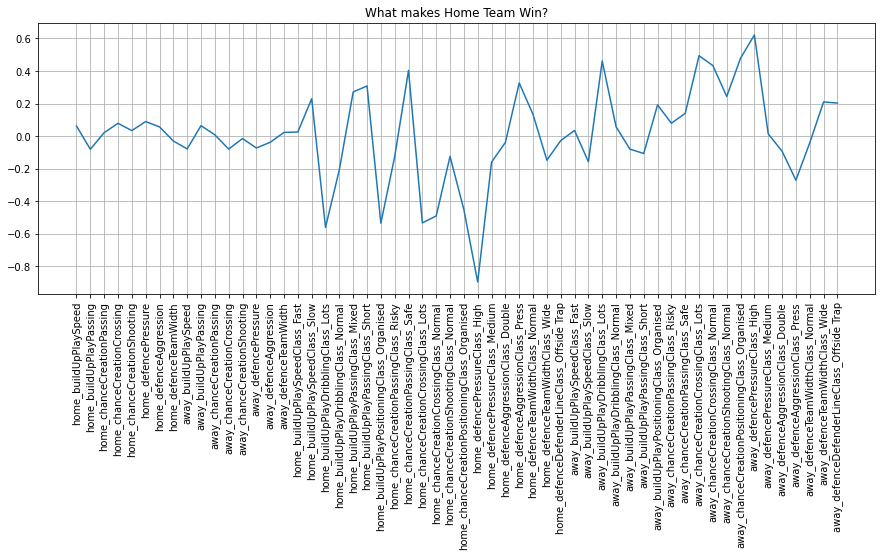

In [60]:
fig = plt.figure(figsize=(15, 5))
plt.plot(X.columns, model_lr.coef_[0])
plt.xticks(rotation=90)
plt.title('What makes Home Team Win?')
plt.grid()
plt.show()

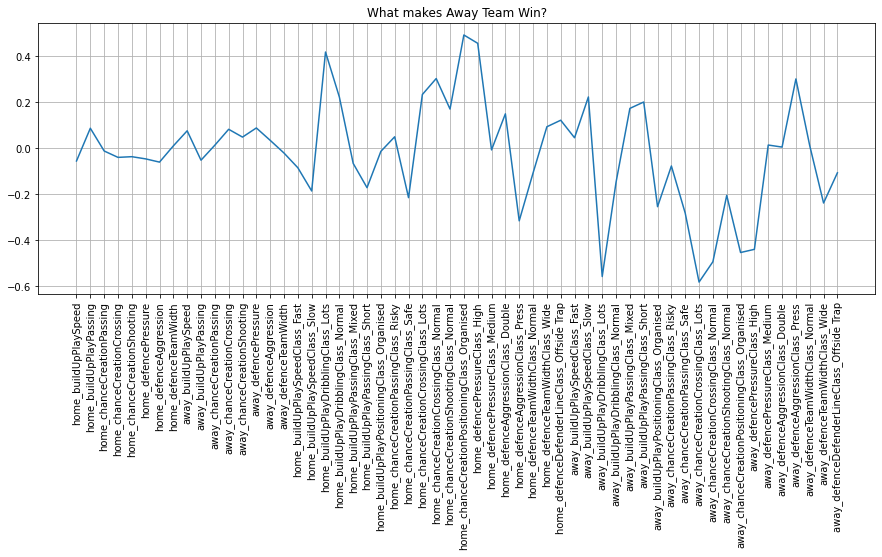

In [61]:
fig = plt.figure(figsize=(15, 5))
plt.plot(X.columns, model_lr.coef_[2])
plt.xticks(rotation=90)
plt.title('What makes Away Team Win?')
plt.grid()
plt.show()

* XGBoost 모델로 특징의 중요도 확인하기

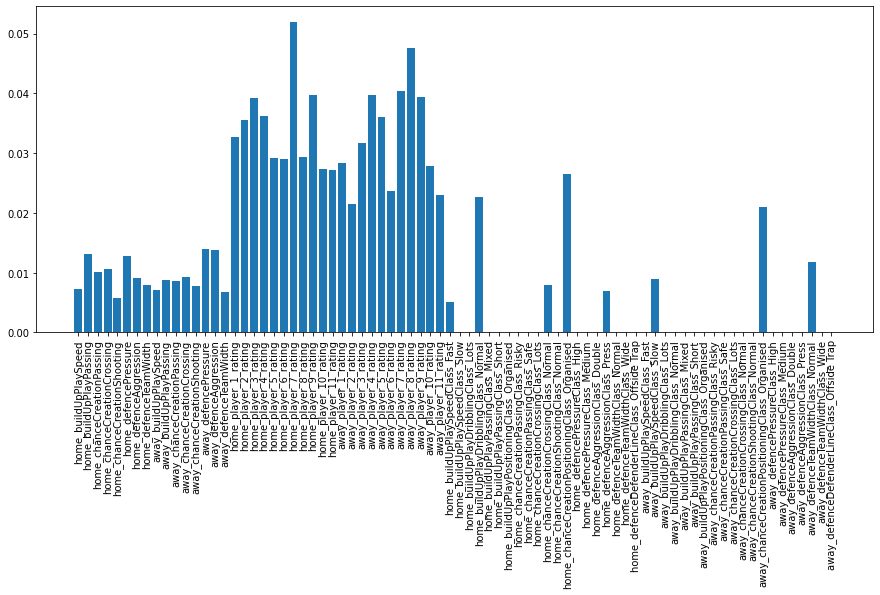

In [97]:
fig = plt.figure(figsize=(15, 6))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## 참고
* 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제